### Machine Learning - CSCI 6505
#### Assignment 1
#### Submitted by: Aakash Patel - B00807065

#### IMPORTS

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.image as mpimg
from IPython.display import Image
%matplotlib inline
matplotlib.style.use('ggplot') 
from sklearn.neighbors import KNeighborsClassifier

#### Q1 a) Dataset Creation

In [2]:
x1= np.arange(-1.5, 1.6, 0.1)             #inclusive of -1.5 and 1.5
x1= np.around(x1, decimals=1, out=None)   #rounded off values to one decimal place
dim1= x1.tolist()
dim2= dim1
random.shuffle(dim1)
random.shuffle(dim2)
x1_coord=[]
x2_coord=[]
point=[]
for i in dim1:   
    for j in dim2:
        x1_coord.append(i)
        x2_coord.append(j)    
        pt=[]
        pt.append(i)
        pt.append(j)
        point.append(np.asarray(pt))
dataset = pd.DataFrame()
dataset['x0']=x1_coord
dataset['x1']=x2_coord
dataset['point'] = list(np.asarray(point))

In [3]:
np.stack( dataset['point'].head(), axis=0 )

array([[ 0.8,  0.8],
       [ 0.8,  0.4],
       [ 0.8, -1. ],
       [ 0.8, -0.4],
       [ 0.8, -1.2]])

In [4]:
#training point class determination
classlist=[]
for p in (point):
    x=np.linalg.norm([p[0],p[1]], 2)    
    if x<1 or x==1:
       classlist.append(1)
    else:
       classlist.append(2)
dataset['class']=classlist

In [5]:
dataset['class'].head().values

array([2, 1, 2, 1, 2])

In [6]:
dataset.head()

,x0,x1,point,class
0,0.8,0.8,"[0.8, 0.8]",2
1,0.8,0.4,"[0.8, 0.4]",1
2,0.8,-1.0,"[0.8, -1.0]",2
3,0.8,-0.4,"[0.8, -0.4]",1
4,0.8,-1.2,"[0.8, -1.2]",2


#### Scatterplots

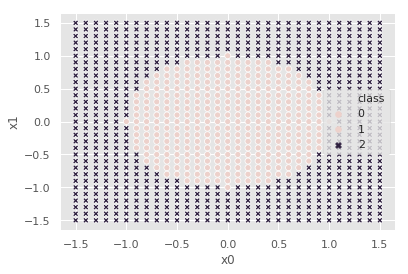

In [7]:
sns.scatterplot(x="x0", y="x1", hue="class", style="class",data=dataset)

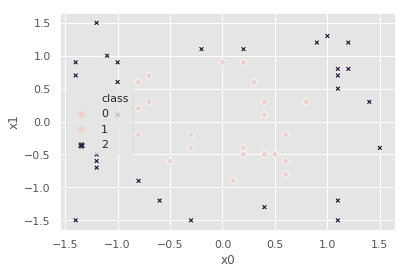

In [8]:
df=dataset.sample(50)
sns.scatterplot(x="x0", y="x1", hue="class", style="class",data=df)

#### Q1 b) KNN Implementation

In [24]:
from math import sqrt
from collections import Counter
import sys

def euclidean_distance(x,y):
    return np.linalg.norm(x-y, 2)

def nearest_labels(x,y_train):
    return y_train[x]

def apply_predict(x, self):
    return self._predict(x)
    
class KNN:
    def __init__(self, k , num_classes):
        self.num_classes = num_classes
        self.k = k
        self.parameters = None
    
    def train(self, training_data, training_labels):
        """
        Train the classifier using the training data and training labels.
        Store whatever you think is neccessary in self.parameters.
        """
        self.X_train=np.stack(training_data,axis=0)
        self.y_train=training_labels
        
    
    def predict(self, data):
        """
        Make use of the trained parameters to predict the class.
        Try using np.lingalg.norm() to compute distances.
        Input should be a LIST of d-dimensional points.
        The return value should be a LIST of scalars between 1 and num_classes,
        indicating for each input point how it is classified.
        """
        data = np.stack(data, axis=0)
        predicted_labels=np.empty((0, 1), int)
        predicted_labels = np.apply_along_axis( apply_predict, 1, data, self)

        return list(predicted_labels)
    
    def _predict(self,x):
        
        #compute distances
        distances=np.empty((0, 1), float)
        k_nearest_labels=np.empty((0,1),int)
        
        p=self.X_train
        q=x.reshape((1, p.shape[1]))
        distances = np.apply_along_axis(euclidean_distance, 0, p.T, q)

        # get k nearest samples, labels
        k_indices=np.argsort(distances,axis=None)[:self.k]
        k_nearest_labels = np.apply_along_axis(nearest_labels, 0, k_indices, self.y_train )

        #majority vote, most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
    
    def accuracy(self, data, labels):
        """
        Returns the proportion of correct classifications computed over data.
        """
        data = np.stack(data, axis=0)
        predicted_labels=self.predict(list(data))
        results = predicted_labels-labels
        incorrect = np.count_nonzero(results)
        return (1 - incorrect/len(results))                    

#### Sample Runs

In [25]:
df_train=dataset[:700]
df_test=dataset[700:961]
clf= KNN(k=1,num_classes=2)
clf.train(df_train["point"], df_train["class"].values)
labels = clf.predict(df_test["point"])
print(labels)
print(clf.accuracy(df_test["point"], df_test["class"].values))

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2]
0.9425287356321839


In [26]:
df_train=dataset[:700]
df_test=dataset[700:961]
clf= KNN(k=21,num_classes=2)
clf.train(df_train["point"], df_train["class"].values)
labels = clf.predict(df_test["point"])
print(labels)
print(clf.accuracy(df_test["point"], df_test["class"].values))

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2]
0.9846743295019157


#### Q1 c) Predictions Visualizations

Reference:
[KNN classification in Python](http://benalexkeen.com/k-nearest-neighbours-classification-in-python/)

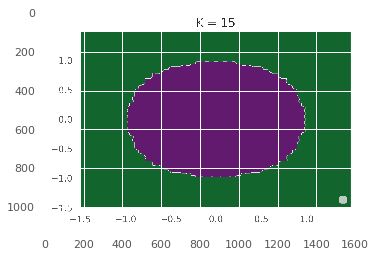

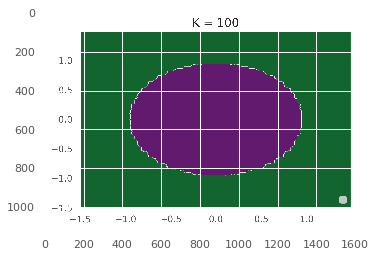

In [102]:
colors = {0: 'violet', 1: 'indigo'}

# Get decision boundaries from model

xx, yy = np.meshgrid(np.arange(-1.5, 1.5, 0.01),np.arange(-1.5, 1.5, 0.01))
for k in [15, 100]:
    clf = KNN(k=k,num_classes=2)
    clf.train(dataset['point'], dataset['class'].values)
    testdata=np.c_[xx.ravel(), yy.ravel()]
    testdata=list(testdata)
    Z = clf.predict(testdata)
    Z = np.asarray(Z)
    Z = Z.reshape(xx.shape)

    # Plot the contour map
    plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn)
    plt.axis('tight')

    plt.legend(loc='lower right')
    plt.title('K = '+str(k))
    plt.savefig( 'q1c_k_'+str(k)+'.png', dpi=300, bbox_inches='tight')
    plt.show()
    
# img=mpimg.imread('q1c_k_15.png')
# imgplot = plt.imshow(img)
# plt.show()
# img=mpimg.imread('q1c_k_100.png')
# imgplot = plt.imshow(img)
# plt.show()
    

Shape of plot gets more and more elliptical with increase in K.

#### Q1 d) Different Dataset

In [9]:
df_1d=dataset.copy()
classlist_1d=[]
for p in (point):
    x=np.linalg.norm([p[0],p[1]], 1)    
    if x<1 or x==1:
       classlist_1d.append(1)
    else:
       classlist_1d.append(2)
df_1d['class']=classlist_1d

No handles with labels found to put in legend.


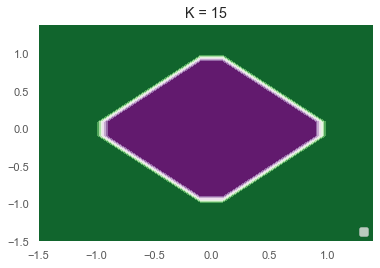

No handles with labels found to put in legend.


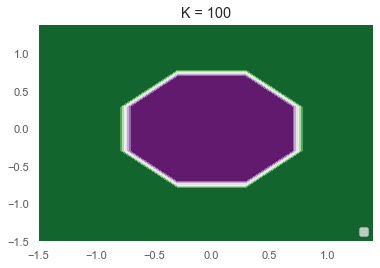

In [15]:
colors = {0: 'violet', 1: 'indigo'}

# Get decision boundaries from model
xx, yy = np.meshgrid(np.arange(-1.5, 1.5, 0.1),np.arange(-1.5, 1.5, 0.1))
for k in [15, 100]:
    clf = KNN(k=k,num_classes=2)
    clf.train(df_1d['point'], df_1d['class'].values)
    testdata=np.c_[xx.ravel(), yy.ravel()]
    testdata=list(testdata)
    Z = clf.predict(testdata)
    Z = np.asarray(Z)
    Z = Z.reshape(xx.shape)

    # Plot the contour map
    plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn)
    plt.axis('tight')

    plt.legend(loc='lower right')
    plt.title('K = '+str(k))
    plt.savefig( 'q1d_k_'+str(k)+'.png', dpi=300, bbox_inches='tight')
    plt.show()

Shape of plot gets more and more elliptical with increase in K. It gets taper in the boundary areas. The chances of misclassification increase due to the larger value of k.

#### Q1 e) Exploring other datasets

In [10]:
df_1e=dataset.copy()
classlist_1e=[]
for p in (point):
    x=np.linalg.norm([p[0],p[1]], 0.4)    
    if x<1 or x==1:
       classlist_1e.append(1)
    else:
       classlist_1e.append(2)   
df_1e['class']=classlist_1e

No handles with labels found to put in legend.


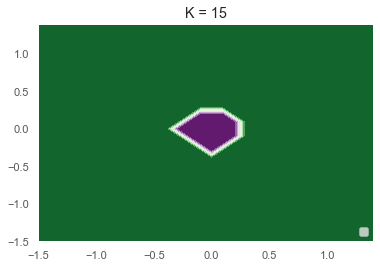

No handles with labels found to put in legend.


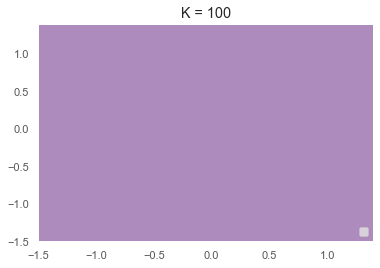

In [21]:
colors = {0: 'violet', 1: 'indigo'}

# Get decision boundaries from model
xx, yy = np.meshgrid(np.arange(-1.5, 1.5, 0.1),np.arange(-1.5, 1.5, 0.1))
for k in [15, 100]:
    clf = KNN(k=k,num_classes=2)
    clf.train(df_1e['point'], df_1e['class'].values)
    testdata=np.c_[xx.ravel(), yy.ravel()]
    testdata=list(testdata)
    Z = clf.predict(testdata)
    Z = np.asarray(Z)
    Z = Z.reshape(xx.shape)

    # Plot the contour map
    plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn)
    plt.axis('tight')

    plt.legend(loc='lower right')
    plt.title('K = '+str(k))
    plt.show()

 I think Euclidean distance is not always better. We can use Mahalnobis distance, as it transforms random vector into a zero mean vector with an identity matrix for covariance[[1](https://www.quora.com/What-exactly-is-Mahalanobis-distance-How-is-it-different-from-Euclidean-distance)].In such a case, Mahalnobis distance is much better.

#### Q2 a) Exploring k values

In [84]:
# Reading MNIST dataset 
mnist_train = pd.read_csv("./input/mnist/mnist_train.csv")
mnist_test=pd.read_csv("./input/mnist/mnist_test.csv")

X_train = mnist_train.iloc[:,1:].values
y_train= mnist_train.iloc[:,0].values
X_test = mnist_test.iloc[:,1:].values
y_test = mnist_test.iloc[:,0].values
print("X Train: ",X_train.shape)
print("y Train:", y_train.shape)
print("X Test:", X_test.shape)
print("y Test:",y_test.shape)

X Train:  (59999, 784)
y Train: (59999,)
X Test: (9999, 784)
y Test: (9999,)


##### Training Accuracy Plot

k=1, train accuracy=100.00%
k=11, train accuracy=90.60%
k=21, train accuracy=87.73%
k=31, train accuracy=84.87%
k=41, train accuracy=83.07%
k=51, train accuracy=81.67%
k=61, train accuracy=80.53%
k=71, train accuracy=79.20%
k=81, train accuracy=78.27%
k=91, train accuracy=76.87%


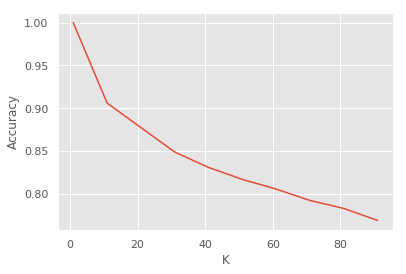

In [85]:
accuracies=[]
klist=[]

X_train = X_train[:1500]
y_train = y_train[:1500]
X_test = X_test[:500]
y_test = y_test[:500]

for k in range(1, 100, 10):
    # train the k-Nearest Neighbor classifier with the current value of `k`
    model = KNN(k,10)
    model.train(list(X_train), y_train)
    # evaluate the model and update the accuracies list
    score = model.accuracy(list(X_train), y_train)
    print("k=%d, train accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)
    klist.append(k)

viz = pd.DataFrame()
viz['K']=klist
viz['Accuracy']=accuracies
ax = sns.lineplot(x="K", y="Accuracy", data=viz)  

##### Testing Accuracy Plot

k=1, accuracy=84.00%
k=11, accuracy=84.40%
k=21, accuracy=79.20%
k=31, accuracy=78.80%
k=41, accuracy=76.60%
k=51, accuracy=75.60%
k=61, accuracy=72.80%
k=71, accuracy=71.80%
k=81, accuracy=70.40%
k=91, accuracy=69.80%


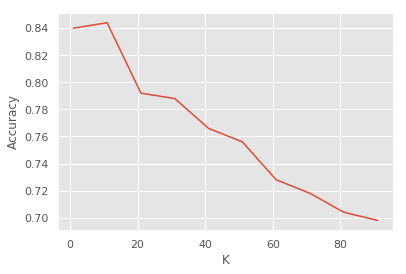

In [71]:
accuracies=[]
klist=[]

for k in range(1, 100, 10):
    # train the k-Nearest Neighbor classifier with the current value of `k`
    model = KNN(k,10)
    model.train(list(X_train), y_train)
    # evaluate the model and update the accuracies list
    score = model.accuracy(list(X_test), y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)
    klist.append(k)

viz = pd.DataFrame()
viz['K']=klist
viz['Accuracy']=accuracies
ax = sns.lineplot(x="K", y="Accuracy", data=viz)  

#### Q2 b) Exploring data set size

In [78]:
mnist_train_sampled = mnist_train.sample(n=5000, random_state=1)
mnist_test_sampled = mnist_test.sample(n=500, random_state=42)

X_train = mnist_train_sampled.iloc[:,1:].values
y_train= mnist_train_sampled.iloc[:,0].values
X_test = mnist_test_sampled.iloc[:,1:].values
y_test = mnist_test_sampled.iloc[:,0].values

print("X Train: ",X_train.shape)
print("y Train:", y_train.shape)
print("X Test:", X_test.shape)
print("y Test:",y_test.shape)

k=93    # According the classification plot above
model = KNN( k=k, num_classes = 10)
model.train(list(X_train), y_train)

#Training Accuracy
score = model.accuracy(list(X_train), y_train)
print("k=%d, train accuracy=%.2f%%" % (k, score * 100))

#Testing accuracy
score = model.accuracy(list(X_test), y_test)
print("k=%d, test accuracy=%.2f%%" % (k, score * 100))

X Train:  (5000, 784)
y Train: (5000,)
X Test: (500, 784)
y Test: (500,)
k=93, train accuracy=86.64%
k=93, test accuracy=84.20%


#### Q2 c) Exploring image resolutions

In [79]:
import skimage.measure as measure

X_train = mnist_train.iloc[:,1:].values
y_train= mnist_train.iloc[:,0].values
X_test = mnist_test.iloc[:,1:].values
y_test = mnist_test.iloc[:,0].values

def reduce_dim(x):
    return measure.block_reduce(x.reshape(28,28), (2,2), np.max)

X_train = np.apply_along_axis( reduce_dim, 1, X_train)
X_train = X_train.reshape(X_train.shape[0], (X_train.shape[1])**2)
print(X_train.shape)
X_test = np.apply_along_axis( reduce_dim, 1, X_test)
X_test = X_test.reshape(X_test.shape[0], (X_test.shape[1])**2)
print(X_test.shape)

(59999, 196)
(9999, 196)


##### Training Accuracy Plot

In [80]:
accuracies=[]
klist=[]

X_train = X_train[:1500]
y_train = y_train[:1500]
X_test = X_test[:500]
y_test = y_test[:500]

for k in range(1, 100, 10):
    # train the k-Nearest Neighbor classifier with the current value of `k`
    model = KNN(k,10)
    model.train(list(X_train), y_train)
    # evaluate the model and update the accuracies list
    score = model.accuracy(list(X_train), y_train)
    print("k=%d, train accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)
    klist.append(k)

viz = pd.DataFrame()
viz['K']=klist
viz['Accuracy']=accuracies

k=1, train accuracy=100.00%
k=11, train accuracy=90.80%
k=21, train accuracy=88.80%
k=31, train accuracy=85.93%
k=41, train accuracy=84.80%
k=51, train accuracy=82.93%
k=61, train accuracy=81.87%
k=71, train accuracy=80.27%
k=81, train accuracy=79.73%
k=91, train accuracy=78.53%


ValueError: Could not interpret input 'Train Accuracy'

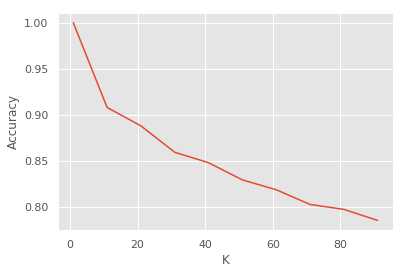

In [82]:
ax = sns.lineplot(x="K", y="Accuracy", data=viz) 

##### Testing Accuracy Plot

k=1, accuracy=88.00%
k=11, accuracy=86.60%
k=21, accuracy=83.20%
k=31, accuracy=81.60%
k=41, accuracy=79.20%
k=51, accuracy=77.40%
k=61, accuracy=76.00%
k=71, accuracy=74.60%
k=81, accuracy=74.40%
k=91, accuracy=72.60%


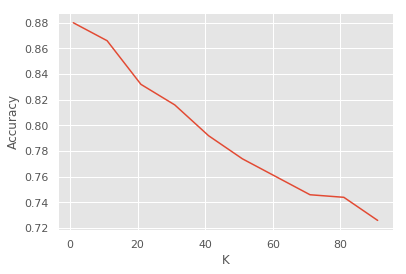

In [73]:
accuracies=[]
klist=[]

for k in range(1, 100, 10):
    # train the k-Nearest Neighbor classifier with the current value of `k`
    model = KNN(k,10)
    model.train(list(X_train), y_train)
    # evaluate the model and update the accuracies list
    score = model.accuracy(list(X_test), y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)
    klist.append(k)

viz = pd.DataFrame()
viz['K']=klist
viz['Accuracy']=accuracies
ax = sns.lineplot(x="K", y="Accuracy", data=viz)    

**Conclusion**
Despite reduction in the image dimensions the plot of classification performance for the algorithm remains the same. It also save the computational complexity to a large extent.
It confirms the intuitive sense that larger the value of k, more sense a particular image pixel point would make. In other words, a pixel in the image only makes sense through the neighbours it's accompanied by.
Training Accuracy also drops significantly in the plots as chances of misclassification increase due to inclusion of distant points in the calculation (arised due to rise in k). 

#### Q3. Curse of dimensionality

References:
1. [Integrating functions in Python](http://kitchingroup.cheme.cmu.edu/blog/2013/02/02/Integrating-functions-in-python/)
2. [Expectation in 2-d](https://math.stackexchange.com/questions/351847/rvs-x-y-uniformly-distributed-in-the-2d-shape-more-information)
3. [Mean and variance of a continuous random variable](https://amsi.org.au/ESA_Senior_Years/SeniorTopic4/4e/4e_2content_4.html)

#### 3 a) Expectation and Variance in 2-d

In [87]:
# Expectation in 2-d
from scipy.integrate import dblquad
def integrand_exp(x,y):
    'y must be the first argument, and x the second.'
    return np.square(x-y)

ans, err = dblquad(integrand_exp, 0, 1,lambda x: 0,lambda x: 1)
print(ans)

0.16666666666666666


In [95]:

#Variance in 2-d
def integrand_var1(x,y):
    'y must be the first argument, and x the second.'
    return np.square((x-y)**2)

def integrand_var2(x,y):
    'y must be the first argument, and x the second.'
    return np.square( np.square(x-y) )

ans1,err = dblquad(integrand_var1, 0, 1,lambda x: 0,lambda x: 1) 
ans2, err = dblquad(integrand_exp, 0, 1,lambda x: 0,lambda x: 1)
print(ans1-ans2**2)

0.0388888888888889


**Explanation:** Here given fuction F(x,y) = (x-y)^2 , is used to determine value of E[x] and Var[x]. With use of double integral, I have calculated the Probabilty Distribution area between the continuous two random variable. Limits 0,1 basically describes the probabilty of the event analogous to how the probability of the event cannot exceed 1. 

#### 3 a) Expectation and Variance in n-d

E[X] = 1   
As every event is equally likely, an event expectation, i.e 1/d, summed up to d times cancels to give 1.  

Var[Z] = E[Z ^ 2] - (E[ Z ]) ^ 2 =  ( 1-d ) / (d * d)

#### Q4. Decision Trees

In [11]:
df_n3=dataset.copy()
classlist_n3=[]
for p in (point):
    x=np.linalg.norm([p[0],p[1]], 3)    
    if x<1 or x==1:
       classlist_n3.append(1)
    else:
       classlist_n3.append(2)   
df_n3['class']=classlist_n3

df_n4=dataset.copy()
classlist_n4=[]
for p in (point):
    x=np.linalg.norm([p[0],p[1]], 4)    
    if x<1 or x==1:
       classlist_n4.append(1)
    else:
       classlist_n4.append(2)   
df_n4['class']=classlist_n4

In [12]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
df_n2=dataset.copy()
df_n1=df_1d.copy()
df_point4=df_1e.copy()

# 0.4 NORM
X_train = df_point4['point'][:500]
X_train = (np.stack((X_train), axis=0))

y_train = df_point4['class'][:500]
y_train = (np.stack(y_train, axis=0))

X_test = df_point4['point'][500:700]
X_test = (np.stack(X_test, axis=0))

y_test = df_point4['class'][500:700]
y_test = (np.stack(y_test, axis=0))

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("0.4 NORM: ",accuracy_score(y_test, y_predict))


# 1 NORM
X_train = df_n1['point'][:500]
X_train = (np.stack((X_train), axis=0))

y_train = df_n1['class'][:500]
y_train = (np.stack(y_train, axis=0))

X_test = df_n1['point'][500:700]
X_test = (np.stack(X_test, axis=0))

y_test = df_n1['class'][500:700]
y_test = (np.stack(y_test, axis=0))

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("1 NORM: ",accuracy_score(y_test, y_predict))

# 2 NORM
X_train = df_n2['point'][:500]
X_train = (np.stack((X_train), axis=0))

y_train = df_n2['class'][:500]
y_train = (np.stack(y_train, axis=0))

X_test = df_n2['point'][500:700]
X_test = (np.stack(X_test, axis=0))

y_test = df_n2['class'][500:700]
y_test = (np.stack(y_test, axis=0))

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("2 NORM: ",accuracy_score(y_test, y_predict))

# 3 NORM
X_train = df_n3['point'][:500]
X_train = (np.stack((X_train), axis=0))

y_train = df_n3['class'][:500]
y_train = (np.stack(y_train, axis=0))

X_test = df_n3['point'][500:700]
X_test = (np.stack(X_test, axis=0))

y_test = df_n3['class'][500:700]
y_test = (np.stack(y_test, axis=0))

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("3 NORM: ",accuracy_score(y_test, y_predict))

# 4 NORM
X_train = df_n4['point'][:500]
X_train = (np.stack((X_train), axis=0))

y_train = df_n4['class'][:500]
y_train = (np.stack(y_train, axis=0))

X_test = df_n4['point'][500:700]
X_test = (np.stack(X_test, axis=0))

y_test = df_n4['class'][500:700]
y_test = (np.stack(y_test, axis=0))

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("4 NORM: ",accuracy_score(y_test, y_predict))

0.4 NORM:  0.97
1 NORM:  0.965
2 NORM:  0.985
3 NORM:  0.995
4 NORM:  0.995


#### Q4 b) MNIST - Loading & Splitting Training Dataset 

In [13]:
# Reading MNIST dataset 
mnist_train = pd.read_csv("./input/mnist/mnist_train.csv")
mnist_test=pd.read_csv("./input/mnist/mnist_test.csv")
X_train = mnist_train.iloc[:,1:].values
y_train= mnist_train.iloc[:,0].values
X_test = mnist_test.iloc[:,1:].values
y_test = mnist_test.iloc[:,0].values

In [14]:
print (X_train.shape) 
num_of_rows = int((X_train.shape[0]) * 0.8)

X_train_splitted = X_train[:num_of_rows] 
X_val = X_train[num_of_rows:]

y_train_splitted = y_train[:num_of_rows] 
y_val = y_train[num_of_rows:]

(59999, 784)


In [17]:
#Decision Tree
param_grid = {
'splitter': ['best', 'random'],
'max_depth': [7,15,20,50,100],
'criterion': ['gini', 'entropy']
}

def evaluateModelsOnSplittedData(model):
    model = model.fit(X_train_splitted, y_train_splitted)
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    print("Training accuracy :",accuracy_score(y_train, y_train_pred)*100)
    print("Validation accuracy :", accuracy_score(y_val, y_val_pred)*100)
    print("Testing accuracy :", accuracy_score(y_test, y_test_pred)*100, "\n")

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
for key in param_grid:
    for param_value in param_grid[key]:
        
        if(key=='criterion'):
            model = DecisionTreeClassifier( criterion = param_value)
        elif(key=='max_depth'):
            model = DecisionTreeClassifier( max_depth = param_value )
        elif(key=='splitter'):
            model = DecisionTreeClassifier( splitter = param_value )
        
        print("Model performance with "+ key+ " = "+ str(param_value)+":")
        evaluateModelsOnSplittedData(model)
             

Model performance with splitter = best:
Training accuracy : 97.53329222153702
Validation accuracy : 87.66666666666667
Testing accuracy : 87.18871887188719 

Model performance with splitter = random:
Training accuracy : 97.4599576659611
Validation accuracy : 87.3
Testing accuracy : 86.47864786478647 

Model performance with max_depth = 7:
Training accuracy : 78.63964399406656
Validation accuracy : 79.4
Testing accuracy : 78.42784278427843 

Model performance with max_depth = 15:
Training accuracy : 96.24827080451341
Validation accuracy : 87.94999999999999
Testing accuracy : 87.77877787778779 

Model performance with max_depth = 20:
Training accuracy : 97.1232853880898
Validation accuracy : 87.80833333333334
Testing accuracy : 87.63876387638764 

Model performance with max_depth = 50:
Training accuracy : 97.48162469374489
Validation accuracy : 87.40833333333333
Testing accuracy : 87.22872287228722 

Model performance with max_depth = 100:
Training accuracy : 97.54329238820647
Validation 

### Conclusion and Observations:
-Validation and Test set accuracies are nearly same. So model can be said to perform equally well on the both the sets.

Meta Parameters:

    - Splitter: Any because the choice of parameter is not making any statistical difference in model performance.

    - Max Depth: 20. Having low depth is making model underfit. As the max depth increases it tends to best fit before it overfits on higher values of parameter. So, considering the average case for the data we can say max_depth as 20 to perform well.

    - Criterion: For criterion parameter as well, model seems to perform equally well for both values. But as Entropy involves logarithmic computation of probabilities it may take longer to execute. So, best criterion to go for would be "Gini index" 

In [19]:
model = DecisionTreeClassifier( max_depth = 20, splitter= "best", criterion='gini')
print("Performance with best parameters:")
evaluateModelsOnSplittedData(model)

Performance with best parameters:
Training accuracy : 97.14828580476342
Validation accuracy : 87.9
Testing accuracy : 87.4987498749875 



#### END 

In [16]:
model = KNeighborsClassifier(n_neighbors=3,algorithm="brute")
model.fit(X_train_splitted, y_train_splitted)
# evaluate the model and update the accuracies list
score = model.score(X_val, y_val)
print("k=%d, accuracy=%.2f%%" % (3, score * 100))